### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

from acquire import get_telco_data
from prepare import prepare_telco_all
from prepare import prepare_telco
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_telco_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [3]:
train, validate, test = prepare_telco(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (3943, 29)
validate -> (1691, 29)
test -> (1409, 29)


,4604,5566,6204,5837,1276
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF
male,1,0,1,1,1
senior_citizen,1,0,0,0,0
partners,0,0,1,0,0
dependents,1,0,1,1,0
tenure,56,2,22,1,23
phone_service,1,1,1,1,1
multiple_lines,0,0,0,0,0
internet_service_type,2,3,3,3,1
online_security,1,0,0,0,0


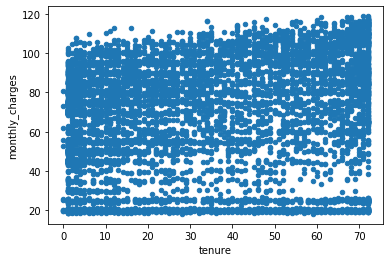

In [4]:
df.plot.scatter(y ='monthly_charges', x ='tenure')

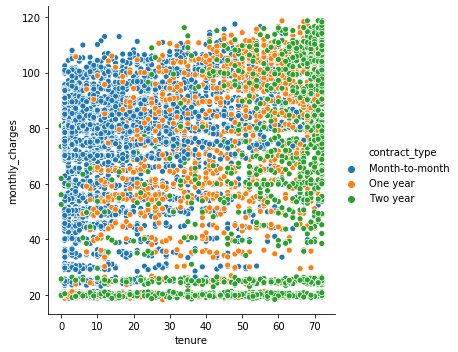

In [5]:
sns.relplot(x='tenure', y='monthly_charges', hue='contract_type', data=df)

In [6]:
print(df.tenure.describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


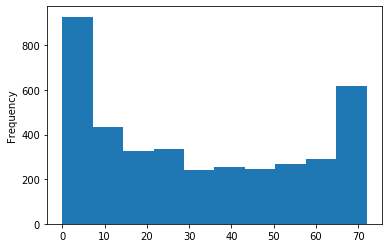

In [7]:
train.tenure.plot.hist()

In [8]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler.fit(train[['tenure']])
# 3. use the object
train['tenure_scaled'] = scaler.transform(train[['tenure']])
test['tenure_scaled'] = scaler.transform(test[['tenure']])
validate['tenure_scaled'] = scaler.transform(validate[['tenure']])

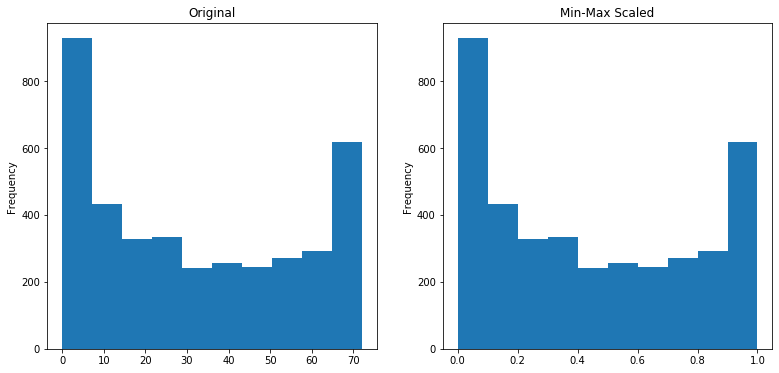

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Original')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Min-Max Scaled')

In [10]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

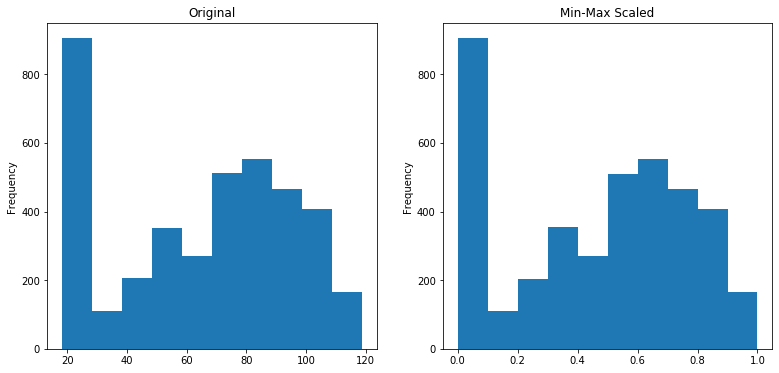

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [12]:
train.T

,4604,5566,6204,5837,1276,3042,5110,2090,5217,624,...,4713,1547,4012,3482,4541,1794,817,901,1987,6958
customer_id,1004-NOZNR,1051-GEJLJ,4632-PAOYU,5868-YTYKS,0895-LMRSF,2952-QAYZF,0530-IJVDB,5126-RCXYW,3134-DSHVC,5071-FBJFS,...,2924-KHUVI,5829-NVSQN,7356-IWLFW,4902-OHLSK,9948-YPTDG,0017-DINOC,6629-CZTTH,7377-DMMRI,3400-ESFUW,8612-GXIDD
male,1,0,1,1,1,1,1,1,0,0,...,1,0,1,0,1,1,1,1,1,1
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
partners,0,0,1,0,0,0,0,1,0,1,...,1,1,1,0,1,0,0,0,1,1
dependents,1,0,1,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
tenure,56,2,22,1,23,5,70,54,63,4,...,56,23,46,29,38,54,1,2,55,12
phone_service,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
multiple_lines,0,0,0,0,0,1,1,0,1,0,...,1,0,1,1,0,0,0,0,0,1
internet_service_type,2,3,3,3,1,2,2,1,2,1,...,2,1,2,2,2,1,1,1,1,3
online_security,1,0,0,0,0,0,1,0,1,1,...,1,1,0,0,1,1,0,1,1,0


In [13]:
train = train[["tenure", "monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]
validate = validate[["tenure", "monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]
test = test[["tenure", "monthly_charges", 'tenure_scaled', 'monthly_charges_scaled']]

In [14]:
train

,tenure,monthly_charges,tenure_scaled,monthly_charges_scaled
4604,56,94.80,0.777778,0.761692
5566,2,19.50,0.027778,0.012438
6204,22,19.95,0.305556,0.016915
5837,1,20.25,0.013889,0.019900
1276,23,64.90,0.319444,0.464179
...,...,...,...,...
1794,54,45.20,0.750000,0.268159
817,1,55.70,0.013889,0.372637
901,2,47.80,0.027778,0.294030
1987,55,57.55,0.763889,0.391045


### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [15]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_unscaled'] = scaler.inverse_transform(train[['monthly_charges_scaled']])
train

,tenure,monthly_charges,tenure_scaled,monthly_charges_scaled,monthly_charges_unscaled
4604,56,94.80,0.777778,0.761692,94.80
5566,2,19.50,0.027778,0.012438,19.50
6204,22,19.95,0.305556,0.016915,19.95
5837,1,20.25,0.013889,0.019900,20.25
1276,23,64.90,0.319444,0.464179,64.90
...,...,...,...,...,...
1794,54,45.20,0.750000,0.268159,45.20
817,1,55.70,0.013889,0.372637,55.70
901,2,47.80,0.027778,0.294030,47.80
1987,55,57.55,0.763889,0.391045,57.55


### The data is the same. Have to inverse transform on the scaled data.

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [16]:
train = train[[ "monthly_charges"]]
train

,monthly_charges
4604,94.80
5566,19.50
6204,19.95
5837,20.25
1276,64.90
...,...
1794,45.20
817,55.70
901,47.80
1987,57.55


In [17]:
qt = QuantileTransformer(n_quantiles=10, random_state=0).fit(train)
qt_transform = qt.transform(train)

In [18]:
train.head()

,monthly_charges
4604,94.80
5566,19.50
6204,19.95
5837,20.25
1276,64.90


In [19]:
qt_transform.T

array([[0.82289904, 0.07309942, 0.0994152 , ..., 0.32204155, 0.38946961,
        0.21621622]])

In [20]:
df= pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])

In [21]:
df = df.rename(columns={"monthly_charges": "monthly_charges_scaled"})

In [22]:
df

,monthly_charges_scaled
4604,0.761692
5566,0.012438
6204,0.016915
5837,0.019900
1276,0.464179
...,...
1794,0.268159
817,0.372637
901,0.294030
1987,0.391045


In [23]:
train = pd.concat([train,df], axis=1)
train

,monthly_charges,monthly_charges_scaled
4604,94.80,0.761692
5566,19.50,0.012438
6204,19.95,0.016915
5837,20.25,0.019900
1276,64.90,0.464179
...,...,...
1794,45.20,0.268159
817,55.70,0.372637
901,47.80,0.294030
1987,57.55,0.391045


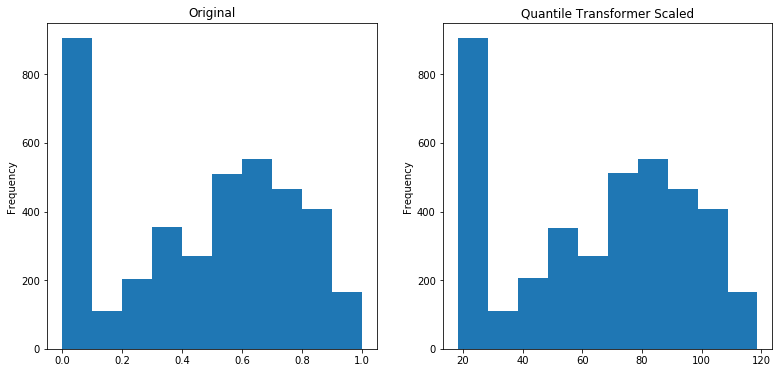

In [24]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges_scaled.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges.plot.hist(title='Quantile Transformer Scaled')

### Easier way of doing it

In [25]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# fit the scalar
scaler.fit(train[['monthly_charges']])
# use the scalar 
train['monthly_charges_scaled2'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled2'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled2'] = scaler.transform(validate[['monthly_charges']])

In [27]:
train

,monthly_charges,monthly_charges_scaled,monthly_charges_scaled2
4604,94.80,0.761692,0.907080
5566,19.50,0.012438,-1.873053
6204,19.95,0.016915,-1.374878
5837,20.25,0.019900,-1.181921
1276,64.90,0.464179,-0.131760
...,...,...,...
1794,45.20,0.268159,-0.549616
817,55.70,0.372637,-0.292857
901,47.80,0.294030,-0.503548
1987,57.55,0.391045,-0.262976
